# 5.a)

In [1]:
import pandas as pd
import sklearn
file = pd.read_csv("realstate.csv")
file.head(5)
from sklearn.linear_model import LinearRegression

X = file[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
               'X4 number of convenience stores', 'X5 latitude',"X6 longitude"]]
y = file['Y house price of unit area']

# test-train split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=101)

In [2]:
X1,X2,X3,X4,X5 = X_train[0:66],X_train[66:130],X_train[130:195],X_train[195:260],X_train[260:331]
y1,y2,y3,y4,y5 = y_train[0:66],y_train[66:130],y_train[130:195],y_train[195:260],y_train[260:331]
z1 = [X1,X2,X3,X4,X5]
z2 = [y1,y2,y3,y4,y5]

In [3]:
from sklearn.linear_model import Ridge
import pandas as pd
import math
from sklearn.metrics import mean_squared_error as mse
opt_score = 99999999999999999999
opt_coef = [0,0,0,0,0,0,0]
for i in range(0,5):
    X = pd.concat([z1[(i+1)%5],z1[(i+2)%5],z1[(i+3)%5],z1[(i+4)%5]])
    y = pd.concat([z2[(i+1)%5],z2[(i+2)%5],z2[(i+3)%5],z2[(i+4)%5]])
    test_x = z1[i]
    test_y = z2[i]
    clf = Ridge(alpha=1.0)
    clf.fit(X, y)
    predict = clf.predict(test_x)
    score = mse(test_y,predict)
    if(opt_score>math.sqrt(score)):
        opt_score = math.sqrt(score)
        opt_coef = clf.coef_
print(opt_score)
print(opt_coef)

8.237824759002583
[ 4.02684213 -0.25915559 -0.0057322   1.03839668  4.76242257 -1.1951185 ]


# 5.b)

In [4]:
from sklearn.linear_model import Lasso
import math
from sklearn.metrics import mean_squared_error as mse
opt_score = 99999999999999999999
alpha_val = [.1,.5,1,1.5,5,10,15,20,25]
opt_alpha = 0
k = 1
for j in alpha_val:
    score1 = []
    for i in range(0,5):
        X = pd.concat([z1[(i+1)%5],z1[(i+2)%5],z1[(i+3)%5],z1[(i+4)%5]])
        y = pd.concat([z2[(i+1)%5],z2[(i+2)%5],z2[(i+3)%5],z2[(i+4)%5]])
        test_x = z1[i]
        test_y = z2[i]
        clf = Lasso(alpha=j)
        clf.fit(X, y)
        predict = clf.predict(test_x)
        score = mse(test_y,predict)
        score1.append(math.sqrt(score))
    print("in ",k," fold the RMSE in cross validation is",sum(score1)/len(score1))
    if(opt_score>(sum(score1)/len(score1))):
        opt_score = sum(score1)/len(score1)
        opt_alpha = j
    k = k+1
print("Optimal score of the in cross validation is: ",opt_score," at alpha:  ",opt_alpha)
print(opt_coef)

in  1  fold the RMSE in cross validation is 10.021253719023443
in  2  fold the RMSE in cross validation is 10.14249067863154
in  3  fold the RMSE in cross validation is 10.17388016553536
in  4  fold the RMSE in cross validation is 10.21001272257435
in  5  fold the RMSE in cross validation is 10.582606423571258
in  6  fold the RMSE in cross validation is 10.6862498793779
in  7  fold the RMSE in cross validation is 10.709204670182828
in  8  fold the RMSE in cross validation is 10.753256772105631
in  9  fold the RMSE in cross validation is 10.81457210113407
Optimal score of the in cross validation is:  10.021253719023443  at alpha:   0.1
[ 4.02684213 -0.25915559 -0.0057322   1.03839668  4.76242257 -1.1951185 ]


# 5.c)

No handles with labels found to put in legend.


(0.06309573444801936,
 1584.8931924611109,
 -190.86835596571598,
 674.5480739402583)

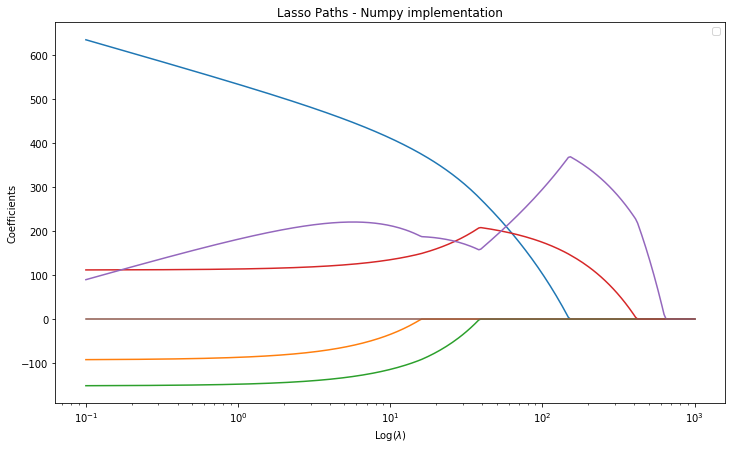

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def soft_threshold(rho,lamda):
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()
X = X_train.values
y = y_train.values.reshape(-1,1)
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,4,300)/10 #Range of lambda values

for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,7))

for i in range(n):
    plt.plot(lamda, theta_lasso[i])#, label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

# 5.d)

In [9]:
from sklearn.linear_model import Ridge
import math
from sklearn.metrics import mean_squared_error as mse
opt_score = 99999999999999999999
lambda1 = [.1]
for k in range(2,50,2):
    lambda1.append(k)
score1 = []
score2 = []
for j in lambda1:
        clf = Ridge(alpha=j)
        clf.fit(X_train, y_train)
        predict1 = clf.predict(X_test)
        predict2 = clf.predict(X_train)
        cv_score = mse(y_test,predict1)
        train_score = mse(y_train,predict2)
        score1.append(math.sqrt(cv_score))
        score2.append(math.sqrt(train_score))

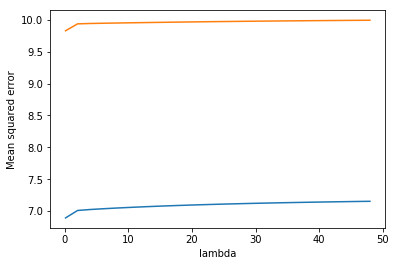

In [10]:
import matplotlib.pyplot as plt
plt.plot(lambda1,score1)
plt.plot(lambda1,score2)
plt.xlabel("lambda")
plt.ylabel("Mean squared error")
plt.show()

In [11]:
from sklearn.linear_model import Lasso
import math
from sklearn.metrics import mean_squared_error as mse
opt_score = 99999999999999999999
lambda1 = [.1]
for k in range(2,50,2):
    lambda1.append(k)
score1 = []
score2 = []
for j in lambda1:
        clf = Lasso(alpha=j)
        clf.fit(X_train, y_train)
        predict1 = clf.predict(X_test)
        predict2 = clf.predict(X_train)
        cv_score = mse(y_test,predict1)
        train_score = mse(y_train,predict2)
        score1.append(math.sqrt(cv_score))
        score2.append(math.sqrt(train_score))

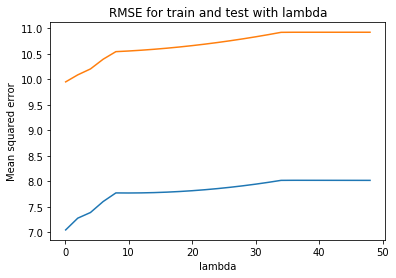

In [12]:
import matplotlib.pyplot as plt
plt.plot(lambda1,score1,label = "xyz")
plt.plot(lambda1,score2,label = "pqr")
plt.xlabel("lambda")
plt.ylabel("Mean squared error")
plt.title("RMSE for train and test with lambda")
plt.show()